In [1]:
import numpy as np
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import StreamPowerEroder, LinearDiffuser, FlowAccumulator
from landlab import imshow_grid
from matplotlib import pyplot as plt
from landlab.components import NormalFault

In [2]:
number_of_rows = 200            
number_of_columns = 200        
dxy = 100                        

In [3]:
mg = RasterModelGrid((number_of_rows, number_of_columns), dxy)

# Create random noise
np.random.seed(0)                                       # seed set to zero so that the results are reproducible
mg_noise = np.random.rand(mg.number_of_nodes)/1000.     # add some topographic noise

# set up the elevation on the grid
zr = mg.add_zeros('node', 'topographic__elevation')
zr += mg_noise

In [4]:
East = 4
North = 4
West = 4
South = 1

In [5]:
mg.set_status_at_node_on_edges(right=East, top=North, left=West, bottom=South)

In [15]:
U = 1E-3                     # Background uplift rate
fault_location = 10000       # Fault distance from the southern border
throw_rate = 1E-3            # Fault slip rate
fault_dip_angle = 60         # Fault dip angle

In [16]:
nf = NormalFault(mg, faulted_surface='topographic__elevation', fault_throw_rate_through_time={'time': [0], 'rate': [throw_rate]}, fault_dip_angle=fault_dip_angle, fault_trace={'x1': number_of_columns/2, 'y1': fault_location, 'x2': number_of_columns-1, 'y2': fault_location})
uplift_rate = np.ones(mg.number_of_nodes)*U

In [8]:
## One-time uplift event
#fault_location = 10000  # [m] (original value = 4000)
#uplift_amount = 100 # [m] (original value = 10)
#zr[np.where(mg.node_y>fault_location)] += uplift_amount 

## Uplift Gradient
#low_uplift_rate = 1E-3 # [m/yr]
#high_uplift_rate = 2E-3 # [m/yr]
#uplift_rate_gradient = (high_uplift_rate - low_uplift_rate)/(number_of_rows-3)
#uplift_rate = low_uplift_rate + ((mg.node_y / dxy)-1) * uplift_rate_gradient

In [9]:
dt = 1000            # time step (yr)
tmax = 1E5           # time for the model loop to run (yr)

In [10]:
total_time = 0 
t = np.arange(0, tmax, dt)

In [11]:
min_drainage_area = 1000    # threshold drainage area to initiate channel formation
K_hs = 1E-3                 # Hillslope diffusivity
K_sp = 1E-4                 # Stream power erodibility
m_sp = 0.5                  # exponent on drainage area in stream power equation 
n_sp = 1                    # exponent on slope in stream power equation
Plot_interval = 10000       # how often a figure is generated (yrs)

In [12]:
frr = FlowAccumulator(mg) 
spr = StreamPowerEroder(mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0.0)
dfn = LinearDiffuser(mg, linear_diffusivity=K_hs, deposit = False)

In [17]:
Plot_Ticker = 0
for ti in t:
    zr[mg.core_nodes] += uplift_rate[mg.core_nodes]*dt  # uplift the landscape
    nf.run_one_step(dt)                                 # translate the fault
    dfn.run_one_step(dt)                                # diffuse the landscape
    frr.run_one_step()                                  # route flow
    spr.run_one_step(dt)                                # fluvial incision
    total_time += dt                                    # update time keeper
    print(total_time)
    Plot_Ticker += dt
    if Plot_Ticker == Plot_interval:
        plt.ioff()
        fig = plt.figure(1)          
        imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'), cmap='terrain', allow_colorbar=True) 
        title_text = '$Year$='+str(total_time) 
        plt.title(title_text)
        plt.tight_layout()
        fig.savefig('/Users/Chris/Desktop/Tectonics-master/DEM/'+str(total_time)+'.pdf',  format='pdf', dpi=300)
        plt.close(fig)
        Plot_Ticker = 0

101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
170000
171000
172000
173000
174000
175000
176000
177000
178000
179000
180000
181000
182000
183000
184000
185000
186000
187000
188000
189000
190000
191000
192000
193000
194000
195000
196000
197000
198000
199000
200000


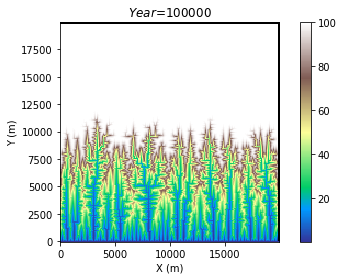

Final Terrain


In [14]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'), cmap='terrain', allow_colorbar=True)
title_text = '$Year$='+str(total_time)  
plt.title(title_text)
plt.tight_layout()
plt.show()
print('Final Terrain')